## Leapfrog Method

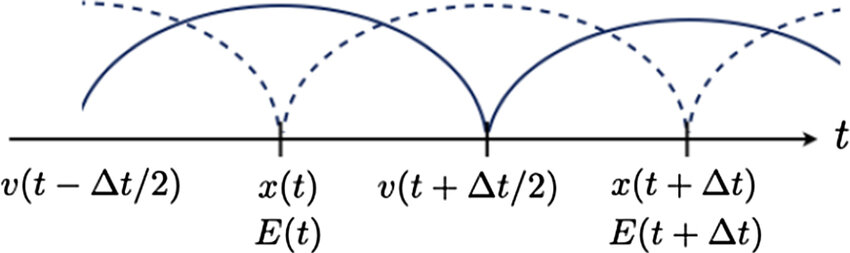

For a differential equation $dx/dt=f(x,t)$, given the initial condition $x(t)$ at some $t$, we calculate the first half-step value $x(t+h/2)$ and at the first step $x(t+h)$:
$$
\begin{align}
x\left(t+\frac{1}{2}h\right) =& x(t)+\frac{1}{2}hf(x,t) \\
x(t+h) =& x(t) + hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)
\end{align}
$$
These values can then be used to calculate all subsequent values using:
$$
\begin{align}
x(t+h) =& x(t) + hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right) \\
x\left(t+\frac{3}{2}h\right) =& x\left(t+\frac{1}{2}h\right) + hf(x(t+h),t+h)
\end{align}
$$
The error is of the order of $h^3$ (same as RK2). Yet this simple method has a huge advantage over powerful methods like RK4: it is **time-reversal symmetric**. If you integrate backward you should end up at the same point where you started. This leads to conservation of quantities like energy (over a full period, not necessarily instantaneously).

## Verlet method

For a second order differential equation like the equation of motion:
$$ \frac{d^x}{dt^2} = f(x,t) $$
or equivalently,
$$
\begin{align}
\frac{dx}{dt} =& v \\
\frac{dv}{dt} =& f(x,t)
\end{align}
$$
This is a special situation, where the right-hand side of the first equation depends only on $v$ and not on $x$, whereas the right-hand side of the second equation depends only on $x$ (and $t$) but not on $v$. Thus, a modified leapfrog algorithm can be applied to solve the equation of motion. If we are given the value of $x$ at some $t$ and the value of $v$ at some time $t+h/2$:
$$
\begin{align}
x(t+h) =& x(t) + hv\left(t+\frac{1}{2}h\right) \\
v\left(t+\frac{3}{2}h\right) =& v\left(t+\frac{1}{2}h\right) + hf(x(t+h),t+h)
\end{align}
$$

### Orbit of the Earth

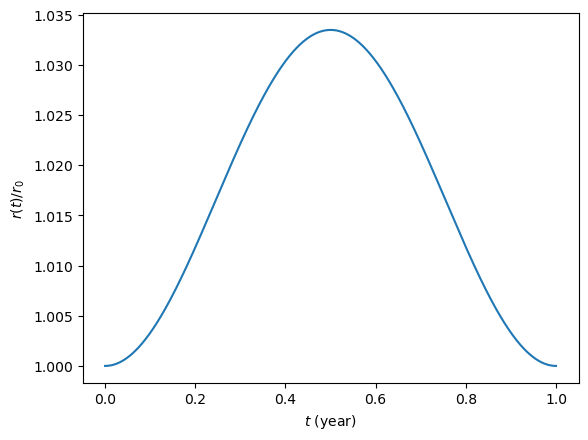

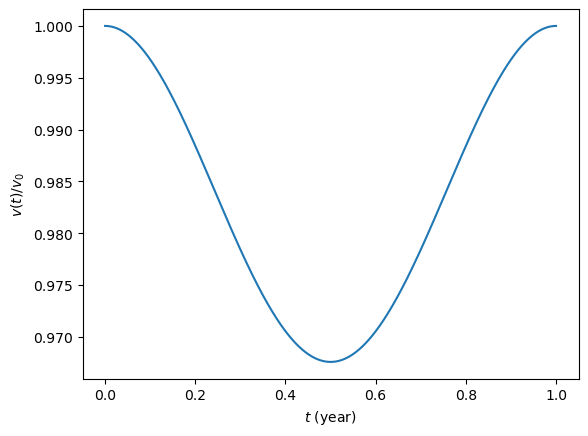

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# constants
G = 6.6738e-11     # Gravitational constant m^3/kg/s^2
M = 1.9891e30      # mass of the sun

# initial conditions: earth at perihelion (point of nearest approach)
r0 = 1.4710e11     # distance of closest approach in m
v0 = 3.0287e4      # linear velocity at closest approach

def f(r,v):
    r0 = (r[0]**2+r[1]**2)**0.5
    fx = v[0]
    fvx = -G*M*r[0]/r0/r0/r0
    fy = v[1]
    fvy = -G*M*r[1]/r0/r0/r0
    return np.array([fx,fvx],float), np.array([fy,fvy],float)

a = 0
b = 365*24*3600
h = 3600

tp = np.arange(a,b,h)
rp = []
vp = []

# appending initial conditions
rp.append(r0)
vp.append(v0)

# we need x(t) and v(t+h/2) for Verlet leapfrog
fxvx, fyvy = f([r0,0],[0,v0])
xh_2  = r0 + 0.5*h*fxvx[0]
yh_2  =  0 + 0.5*h*fyvy[0]
vxh_2 =  0 + 0.5*h*fxvx[1]
vyh_2 = v0 + 0.5*h*fyvy[1]

r = np.array([r0, 0],float)        # initial x and y value at t
v = np.array([vxh_2,vyh_2],float)  # initial vx and vy value at t+h/2

for t in tp[1:]:
    xh  = r[0] + h*v[0]
    yh  = r[1] + h*v[1]
    fxvx, fyvy = f([xh,yh],v)
    vxh = v[0] + h*fxvx[1]
    vyh = v[1] + h*fyvy[1]
    rp.append((xh**2+yh**2)**0.5)
    vp.append((vxh**2+vyh**2)**0.5)
    r = np.array([xh, yh],float)
    v = np.array([vxh,vyh],float)

plt.plot(tp/365/24/3600,np.array(rp)/r0)
plt.xlabel(r'$t$ (year)')
plt.ylabel(r'$r(t)/r_0 $')
plt.show()

plt.plot(tp/365/24/3600,np.array(vp)/v0)
plt.xlabel(r'$t$ (year)')
plt.ylabel(r'$v(t)/v_0$')
plt.show()